# Decision Trees

#### Instructions:
- Write modular code with relevant docstrings and comments for you to be able to use
functions you have implemented in future assignments.
- All theory questions and observations must be written in a markdown cell of your jupyter notebook.You can alsoadd necessary images in `imgs/` and then include it in markdown. Any other submission method for theoretical question won't be entertained.
- Start the assignment early, push your code regularly and enjoy learning!

### Question 1 Optimal DT from table
**[20 points]**\
We will use the dataset below to learn a decision tree which predicts if people pass machine
learning (Yes or No), based on their previous GPA (High, Medium, or Low) and whether or
not they studied. 

| GPA | Studied | Passed |
|:---:|:-------:|:------:|
|  L  |    F    |    F   |
|  L  |    T    |    T   |
|  M  |    F    |    F   |
|  M  |    T    |    T   |
|  H  |    F    |    T   |
|  H  |    T    |    T   |
    
 For this problem, you can write your answers using $log_2$
, but it may be helpful to note
that $log_2 3 ≈ 1.6$.

---
1. What is the entropy H(Passed)?
2. What is the entropy H(Passed | GPA)?
3. What is the entropy H(Passed | Studied)?
4. Draw the full decision tree that would be learned for this dataset. You do
not need to show any calculations.
---


### Question 2 DT loss functions
**[10 points]**
1. Explain Gini impurity and Entropy. 
2. What are the min and max values for both Gini impurity and Entropy
3. Plot the Gini impurity and Entropy for $p\in[0,1]$.
4. Multiply Gini impurity by a factor of 2 and overlay it over entropy.

### Question 3 Training a Decision Tree  
**[40 points]**

You can download the spam dataset from the link given below. This dataset contains feature vectors and the lables of Spam/Non-Spam mails. 
http://archive.ics.uci.edu/ml/machine-learning-databases/spambase/spambase.data

**NOTE: The last column in each row represents whether the mail is spam or non spam**\
Although not needed, incase you want to know what the individual columns in the feature vector means, you can read it in the documentation given below.
http://archive.ics.uci.edu/ml/machine-learning-databases/spambase/spambase.DOCUMENTATION

**Download the data and load it from the code given below**

In [331]:

#######################
import pandas as pd
spam = pd.read_csv('./spambase.data', sep=',', header=None)


#######################


You can try to normalize each column (feature) separately with wither one of the following ideas. **Do not normalize labels**.
- Shift-and-scale normalization: substract the minimum, then divide by new maximum. Now all values are between 0-1
- Zero mean, unit variance : substract the mean, divide by the appropriate value to get variance=1.

In [332]:

#######################
# Your code goes here #
# iterate over the columns of spam and subtract the minimum value of each column from each value in the column
import numpy as np
# get number of columns in spam
num_cols = spam.shape[1]
print(num_cols)
display(spam.head())
for i in range(num_cols):
    if i != num_cols-1:
        spam.iloc[:,i] = spam.iloc[:,i] - np.min(spam.iloc[:,i])
        spam.iloc[:,i] = spam.iloc[:,i] / np.max(spam.iloc[:,i])
# convert the DataFrame spam to a numpy array except for the last column
display(spam.head())
spam = spam.to_numpy()
# get the last column of spam
spam_labels = spam[:,-1]
# # remove the last column from spam
# spam = np.delete(spam, -1, axis=1)

#######################


58


,0,1,2,3,4,5,6,7,8,9,...,48,49,50,51,52,53,54,55,56,57
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


,0,1,2,3,4,5,6,7,8,9,...,48,49,50,51,52,53,54,55,56,57
0,0.000000,0.044818,0.125490,0.0,0.032,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.023955,0.000000,0.000000,0.002502,0.006007,0.017487,1
1,0.046256,0.019608,0.098039,0.0,0.014,0.047619,0.028886,0.006301,0.000000,0.051705,...,0.000000,0.013536,0.0,0.011454,0.029985,0.002421,0.003735,0.010012,0.064836,1
2,0.013216,0.000000,0.139216,0.0,0.123,0.032313,0.026135,0.010801,0.121673,0.013751,...,0.002281,0.014664,0.0,0.008498,0.030651,0.000504,0.008008,0.048458,0.142551,1
3,0.000000,0.000000,0.000000,0.0,0.063,0.000000,0.042641,0.056706,0.058935,0.034653,...,0.000000,0.014048,0.0,0.004218,0.000000,0.000000,0.002303,0.003905,0.011995,1
4,0.000000,0.000000,0.000000,0.0,0.063,0.000000,0.042641,0.056706,0.058935,0.034653,...,0.000000,0.013843,0.0,0.004157,0.000000,0.000000,0.002303,0.003905,0.011995,1


1. Split your data into train 80% and test dataset 20% 
2. **[BONUS]** Visualize the data using PCA . You can reduce the dimension of the data if you want. Bonus marks if this increases your accuracy.

*NOTE: If you are applying PCA or any other type of dimensionality reduction, do it before splitting the dataset*

(4601, 58)


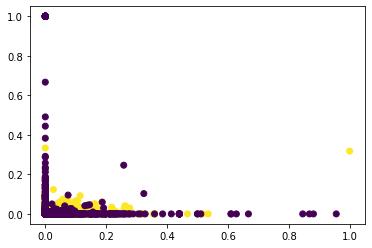

(3680, 57)


In [333]:

#######################
# Your code goes here #
# visualize data using pca
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# pca = PCA(n_components=2)
# pca.fit(spam)
# spam_pca = pca.transform(spam)
# # perform pca on all columns except the last one
# pca = PCA(n_components=2)
# pca.fit(spam[:,:-1])
# spam_pca = pca.transform(spam[:,:-1])
# # split data into 80% training and 20% testing
# # plot spam_pca  
# print(spam_pca.shape)
spam_pca=spam
print(spam_pca.shape)
plt.scatter(spam_pca[:,0], spam_pca[:,1], c=spam_labels)
plt.show()

# X_train, X_test, y_train, y_test = train_test_split(spam_pca, spam_labels, test_size=0.2, random_state=42)
# get last column of spam_pca

X_train, X_test, y_train, y_test = train_test_split(spam_pca[:,:-1], spam_labels, test_size=0.2, random_state=42)

print(X_train.shape)

#######################


You need to perform a K fold validation on this and report the average training error over all the k validations. 
- For this , you need to split the training data into k splits.
- For each split, train a decision tree model and report the training , validation and test scores.
- Report the scores in a tabular form for each validation

In [334]:
# Initialize K and split the data
#Run the K fold Validation and report the scores

#######################
# perform a K fold validation on this and report the average training error over all the k validations
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeClassifier

kf = KFold(n_splits=10, shuffle=True, random_state=42)

clf = DecisionTreeClassifier(random_state=0)
# initialize the list of training scores
training_scores = []
# initialize the list of validation scores
validation_scores = []
testing_scores = []

for train_index, test_index in kf.split(X_train,y_train):
    # split the data into training and validation
    X_train_fold, X_val_fold = X_train[train_index], X_train[test_index]
    y_train_fold, y_val_fold = y_train[train_index], y_train[test_index]
    
    # train the model
    clf.fit(X_train_fold, y_train_fold)
    # get the training score
    training_scores.append(clf.score(X_train_fold, y_train_fold))
    # get the validation score
    validation_scores.append(clf.score(X_val_fold, y_val_fold))
    # get the testing score
    testing_scores.append(clf.score(X_test, y_test))

# print training scores, validation scores, and testing scores in a pandas DataFrame
print(pd.DataFrame({'training_scores': training_scores, 'validation_scores': validation_scores, 'testing_scores': testing_scores}))
# print mean training score, mean validation score, and mean testing score
print("Mean training score: ", np.mean(training_scores))
print("Mean validation score: ", np.mean(validation_scores))
print("Mean testing score: ", np.mean(testing_scores))


#######################


   training_scores  validation_scores  testing_scores
0         0.999396           0.899457        0.907709
1         0.999698           0.904891        0.901194
2         0.999396           0.883152        0.893594
3         0.999396           0.934783        0.912052
4         0.999698           0.918478        0.915309
5         0.999698           0.926630        0.912052
6         0.999698           0.929348        0.900109
7         0.999396           0.899457        0.899023
8         0.999396           0.915761        0.894680
9         0.999396           0.918478        0.913138
Mean training score:  0.9995169082125603
Mean validation score:  0.9130434782608695
Mean testing score:  0.9048859934853419


### Question 4 Random Forest Algorithm
**[30 points]**

1. What is boosting, bagging and  stacking?
Which class does random forests belong to and why? **[5 points]**

2. Implement random forest algorithm using different decision trees. **[25 points]** 

In [335]:
# def random_forest_algorithm(): # Pass necessary params as per requirements
#     #######################
    
#     #######################

# select 7 features at random from the 57 features
# train a decision tree on these 7 features
# repeat this 100 times
# get the majority vote of the 100 decision trees
# return the majority vote
# print number of rows in X_train
from collections import Counter
from math import sqrt

print(X_train.shape[0])
# print number of columns in X_train
print(X_train.shape[1])
dts=[]
dt_features = []

num_trees = 101
for i in range(num_trees):
    # select 7 features at random from the 57 features
    clf=DecisionTreeClassifier(random_state=0,max_depth=8, max_features=int(sqrt(57)))
    #features = np.random.choice(57, 7, replace=False)
    # select all samples randomly with replacement
    samples = np.random.choice(3680, 3680, replace=True)
    clf.fit(X_train[samples], y_train[samples])
    # append the decision tree to the list of decision trees
    dts.append(clf)
    # append the features to the list of features
    #dt_features.append(features)
    # store the decision tree model
    # return the majority vote

# initialize the list of predictions
predictions = []
votes = []
# iterate over testing samples
for i in range(X_test.shape[0]):
    # initialize the list of votes
    
    # iterate over the 100 decision trees
    for j in range(num_trees):
        # get the prediction of the jth decision tree
        pred = dts[j].predict(X_test[i].reshape(1,-1))[0]
        # append the prediction to the list of votes
        
        votes.append(pred)
    # get the majority vote
    #print(votes)
    majority_vote = Counter(votes).most_common(1)[0][0]
    #print(majority_vote)
    
    # append the majority vote to the list of predictions
    predictions.append(majority_vote)
    # reset the list of votes
    votes = []
#print(predictions)
# print the accuracy of the predictions
print("Accuracy: ", np.mean(predictions == y_test))

3680
57
Accuracy:  0.9239956568946797
